In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
import pandas as pd
import numpy as np
import random
np.random.seed(42)
num_samples = 1000
data = {
    "Pepper": np.random.choice([True, False], num_samples),
    "Ginger": np.random.choice([True, False], num_samples),
    "Chilly": np.random.choice([True, False], num_samples)
}
def like_rule(pepper, ginger, chilly):
    return (pepper and ginger) or (not ginger and chilly) or (pepper and not chilly)

data["Liked"] = [like_rule(row[0], row[1], row[2]) for row in zip(data["Pepper"], data["Ginger"], data["Chilly"])]
df = pd.DataFrame(data)
missing_indices = np.random.choice(df.index, size=int(0.05 * num_samples), replace=False)
for col in ["Pepper", "Ginger", "Chilly"]:
    df.loc[missing_indices[:len(missing_indices)//3], col] = np.nan

print(df.head(10))


  Pepper Ginger Chilly  Liked
0   True  False   True   True
1  False   True  False  False
2   True   True  False   True
3   True   True  False   True
4   True   True  False   True
5  False   True   True  False
6   True  False  False   True
7   True   True   True   True
8   True  False   True   True
9  False  False   True   True


<ipython-input-13-d6179a6395c7>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[missing_indices[:len(missing_indices)//3], col] = np.nan
<ipython-input-13-d6179a6395c7>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[missing_indices[:len(missing_indices)//3], col] = np.nan
<ipython-input-13-d6179a6395c7>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[missing_indices[:len(missing_indices)//3], col] = np.nan


In [14]:
print("\nMissing Values Before Handling:")
print(df.isnull().sum())
df.fillna(df.mode().iloc[0], inplace=True)
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
Pepper    16
Ginger    16
Chilly    16
Liked      0
dtype: int64

Missing Values After Handling:
Pepper    0
Ginger    0
Chilly    0
Liked     0
dtype: int64


<ipython-input-14-21bb8c3ef62b>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mode().iloc[0], inplace=True)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X = df[["Pepper", "Ginger", "Chilly"]]
y = df["Liked"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ID3 Decision Tree
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("\nDecision Tree Performance:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))



Decision Tree Performance:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       124
        True       1.00      0.99      1.00       176

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 0.9966666666666667

Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       124
        True       1.00      0.99      1.00       176

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 0.9966666666666667


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("\nSVM Performance:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))



Random Forest Performance:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       124
        True       1.00      0.99      1.00       176

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 0.9966666666666667

SVM Performance:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       124
        True       1.00      0.99      1.00       176

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 0.9966666666666667


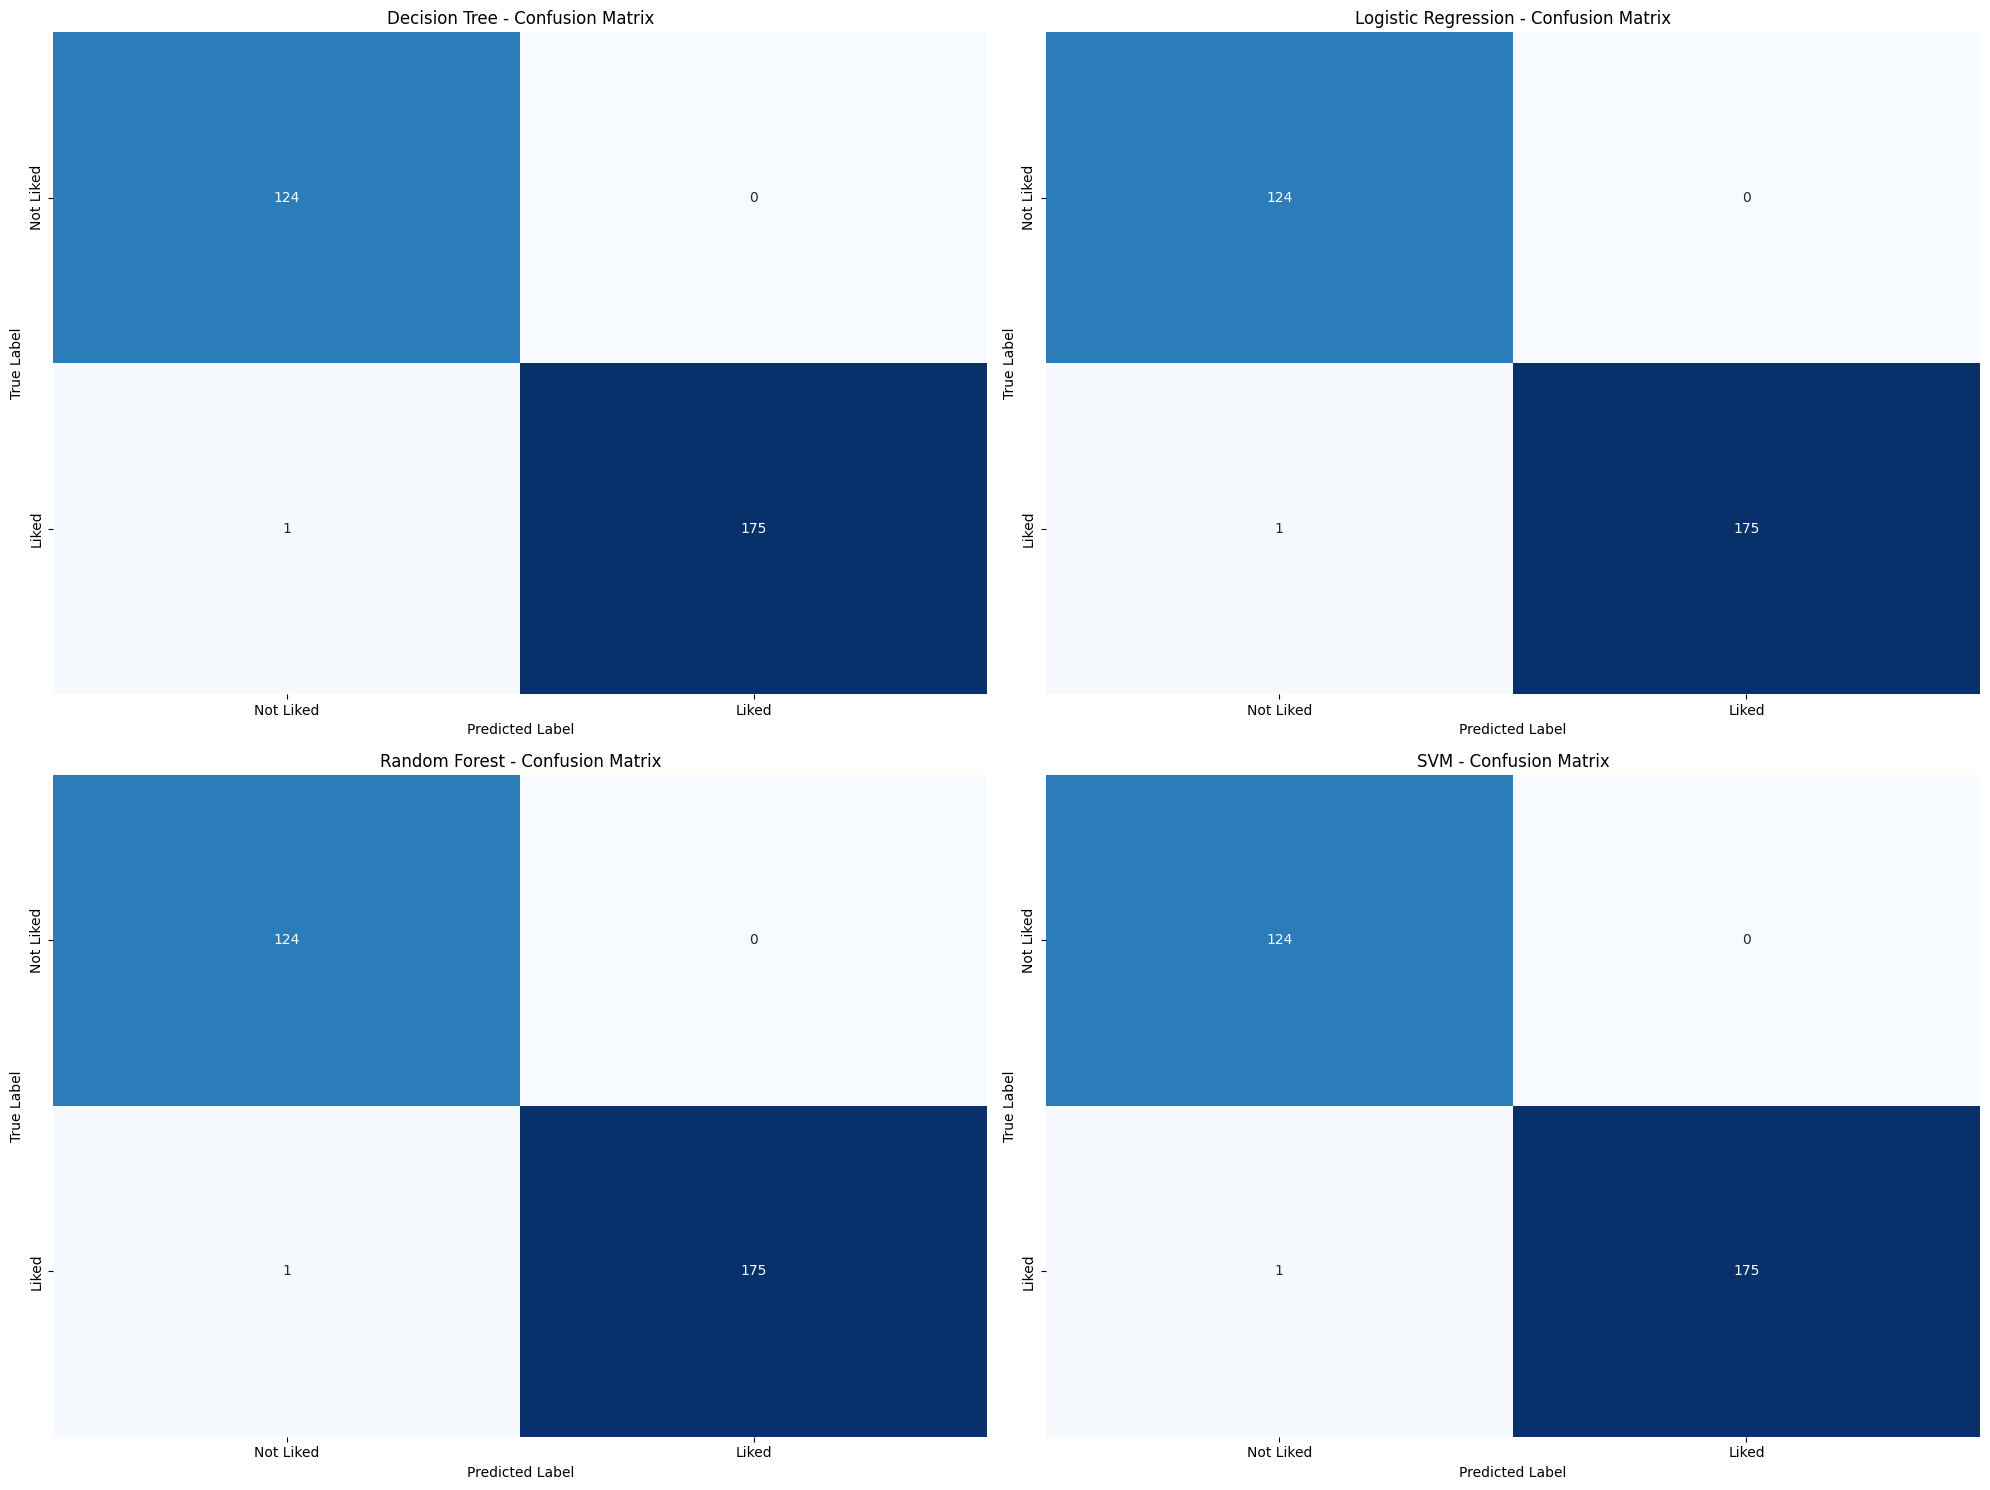

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

models = {
    "Decision Tree": dt_predictions,
    "Logistic Regression": lr_predictions,
    "Random Forest": rf_predictions,
    "SVM": svm_predictions
}

plt.figure(figsize=(20, 15))

for i, (name, predictions) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Not Liked", "Liked"],
                yticklabels=["Not Liked", "Liked"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()

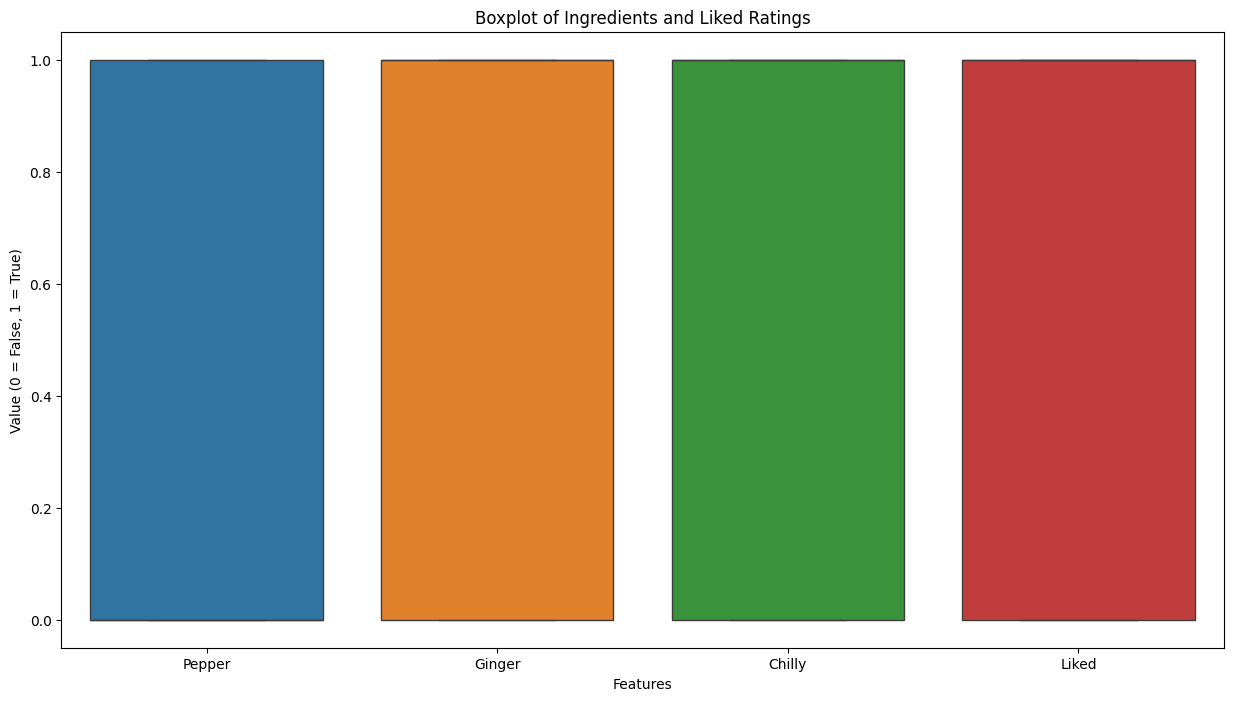

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numerical = df.copy()
df_numerical["Pepper"] = df_numerical["Pepper"].astype(int)
df_numerical["Ginger"] = df_numerical["Ginger"].astype(int)
df_numerical["Chilly"] = df_numerical["Chilly"].astype(int)
df_numerical["Liked"] = df_numerical["Liked"].astype(int)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_numerical[['Pepper', 'Ginger', 'Chilly', 'Liked']])
plt.title("Boxplot of Ingredients and Liked Ratings")
plt.xlabel("Features")
plt.ylabel("Value (0 = False, 1 = True)")
plt.show()

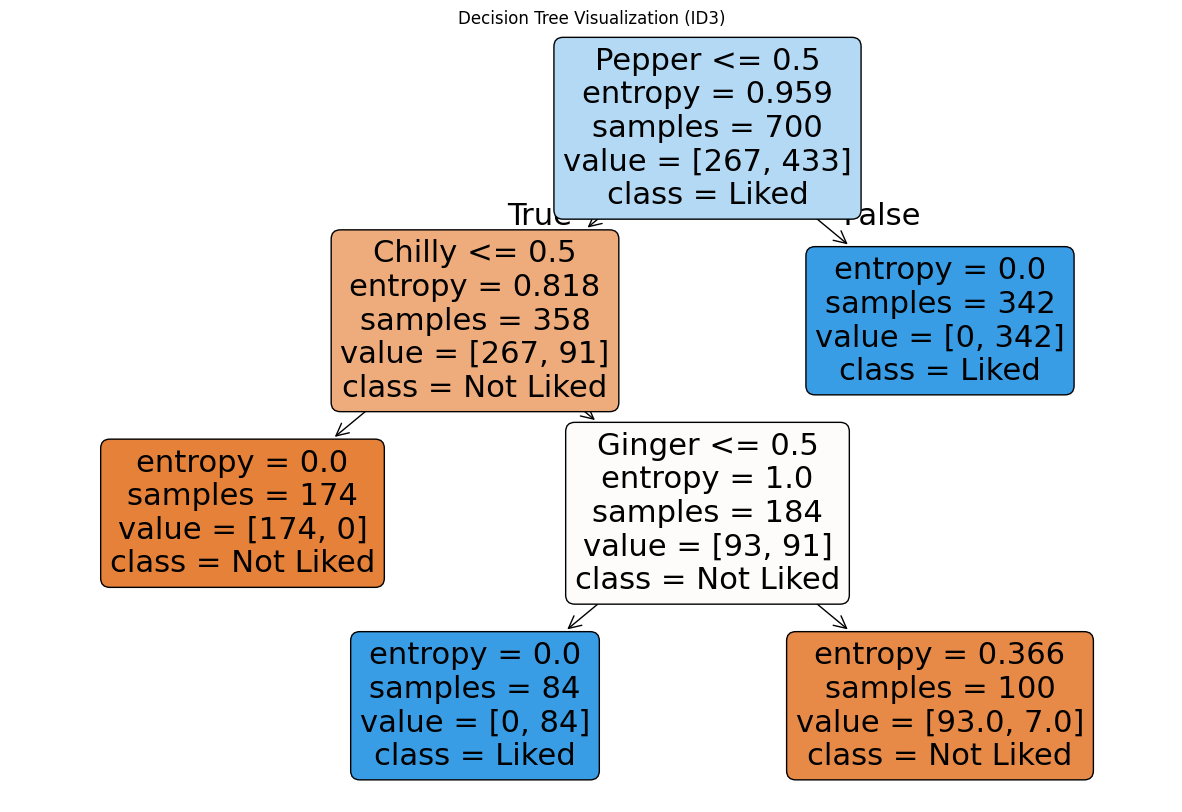

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(dt_model,
          feature_names=["Pepper", "Ginger", "Chilly"],
          class_names=["Not Liked", "Liked"],
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization (ID3)")
plt.show()
